# Data loading

Training data is distributed in 3 different folders (set a, b and c).
Each file has its raw image (.mhd), lung mask (\_lm.mhd), and fissure mask (\_fm.mhd).

In [1]:
import os, random
import ntpath
import SimpleITK
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [2]:
workdir = '/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FISSURE_INTEGRITY/'
train_A_images = os.path.join(workdir, 'set-a')
train_B_images = os.path.join(workdir, 'set-b')
train_C_images = os.path.join(workdir, 'set-c')

a17.mhd
(215, 301, 527)


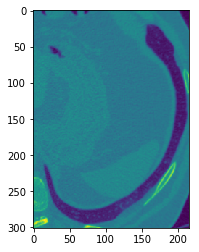

In [3]:
#Print one file:
case = os.path.join(train_A_images, random.choice(os.listdir(train_A_images)))
case_filename = os.path.splitext(ntpath.basename(case))[0] + '.mhd'
img = SimpleITK.ReadImage(train_A_images+ '/' + case_filename)

piece = SimpleITK.GetArrayViewFromImage(img)[50,:,:] #<-- Specify a number for the z-index slice
print(case_filename)
print(img.GetSize())
plt.imshow(piece)


In [4]:
''' Helper function '''
def load_unique_image_names(folder):
    
    uniqueimglist = []
    for file in os.listdir(folder):
        file = file.replace(".mhd", "")
        file = file.replace("_lm", "")
        file = file.replace("_fm", "")
        file = file.replace(".zraw", "")
        if ".csv" not in file:
            uniqueimglist.append(file)
    uniqueimglist = list(set(uniqueimglist))
    return uniqueimglist


''' Load training data from a folder'''
def load_training_set(folder):
    fileList = load_unique_image_names(folder)
    
    trainSet = []
    for file in fileList:
        filePath = folder + '/' + file
        image = lungMask = fissureMask = None
        try:
            image = SimpleITK.ReadImage(filePath + '.mhd')
            lungMask = SimpleITK.ReadImage(filePath + '_lm.mhd')
            fissureMask = SimpleITK.ReadImage(filePath + '_fm.mhd')
            trainSet.append({'name': file, 
                         'image': image, 
                         'lungmask': lungMask,
                         'fissuremask': fissureMask})
        except :
            print("Error reading file: " + file)
            
        
    return trainSet


In [5]:
training = load_training_set(train_A_images)
training.extend(load_training_set(train_B_images))
training.extend(load_training_set(train_C_images))
training = pd.DataFrame(training)

Error reading file: a20
Error reading file: a05
Error reading file: a23
Error reading file: a08
Error reading file: b05


## Investigate

Couple of files returned an error:
```
Error reading file: a20
Error reading file: a08
Error reading file: a05
Error reading file: b05
```

dataframes can be accessed by utilizing `trainingset['image'].values`. This will return an array with the SimpleITK images.

In [6]:
training.head(5)

,fissuremask,image,lungmask,name
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[70, 67, 30, 37, 22, 1, -27, -95, -133, -104, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a03
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-131, -147, -146, -78, -41, -99, -81, -92, -8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a25
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[72, 88, 43, 54, 23, 40, 4, -6, 17, 22, 40, -2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a07
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-1, -26, 50, 103, 92, 71, 73, 65, 83, 12, 41,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a19
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[142, 88, 59, 40, 45, 55, 74, 20, 108, 131, 76...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a00


Save the training set to file

*Actually can't be done, as it can't pickle swigpy objects..*

In [11]:
#store = pd.HDFStore('database.h5')
#store['trainingset'] = training

In [12]:
#training.to_pickle('./train-data.pkl')

# Neural Network

Use a pretrained neural network, but what to use for labels? Do we need to split the whole image first?